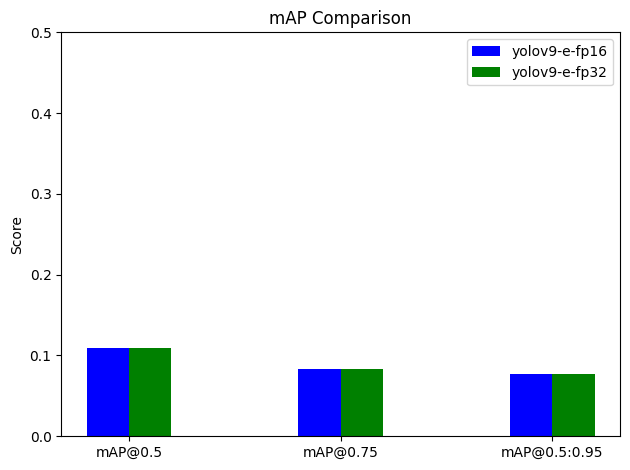

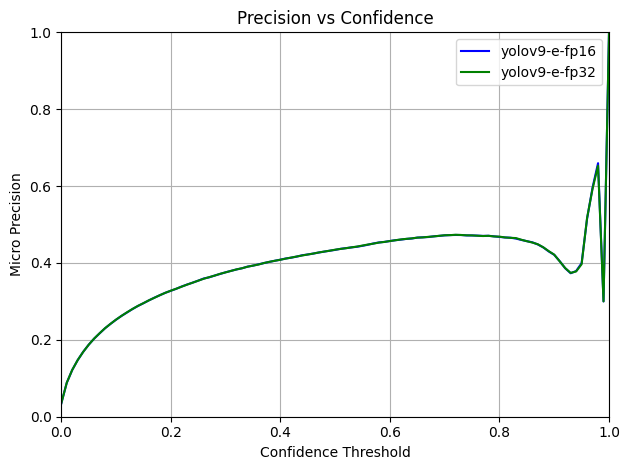

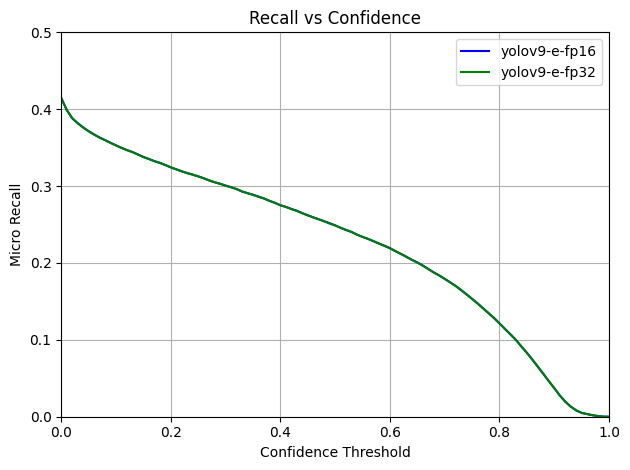

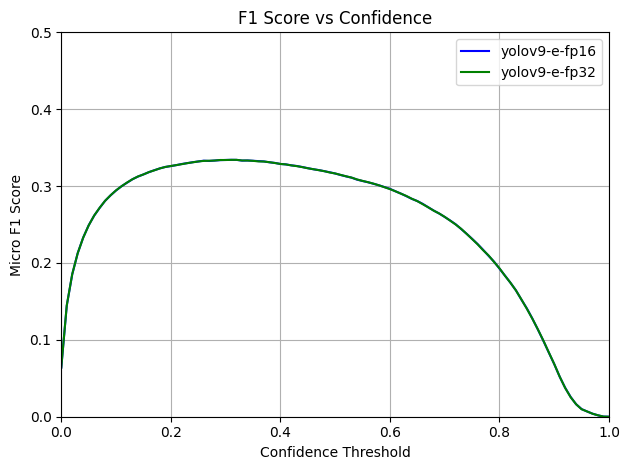

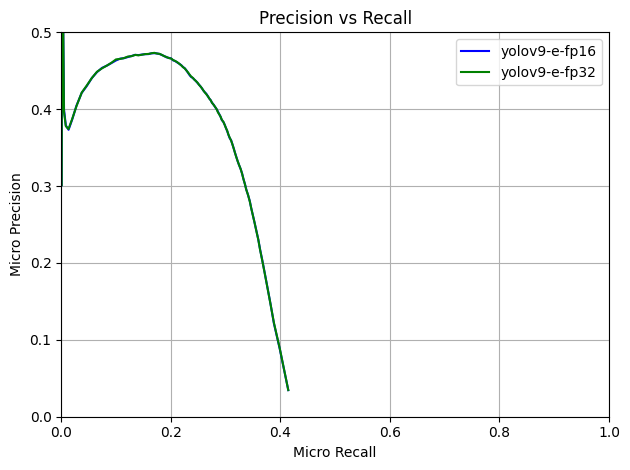

In [2]:
import os
import json
import matplotlib.pyplot as plt
from pathlib import Path

# List of paths to result JSON files
result_files = [
    "/mnt/disk_e/Programming/real-time-object-detection/research/evaluation/yolov9-e-fp16.json",
    "/mnt/disk_e/Programming/real-time-object-detection/research/evaluation/yolov9-e-fp32.json"
]

# === COLORS FOR MULTIPLE MODELS ===
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# === STORAGE STRUCTURES ===
map_metrics = {}
pr_curves = {} 

# Create images directory if it doesn't exist
os.makedirs("images", exist_ok=True)

# === PARSE EACH FILE ===
for file_path in result_files:
    filename = Path(file_path).stem
    with open(file_path, "r") as f:
        data = json.load(f)

    # mAP metrics (replace with actual if you have them stored differently)
    map_metrics[filename] = {
        "map50": data.get("map", {}).get("map_50", {}).get("overall", 0),
        "map75": data.get("map", {}).get("map_75", {}).get("overall", 0),
        "map50_95": data.get("map", {}).get("map_50:95", {}).get("overall", 0),
    }

    # Confidence-based macro metrics
    confidence = []
    precision = []
    recall = []
    f1 = []
    for entry in data["per_confidence"]:
        confidence.append(entry["confidence_threshold"])
        precision.append(entry["micro"]["precision"])
        recall.append(entry["micro"]["recall"])
        f1.append(entry["micro"]["f1_score"])

    pr_curves[filename] = {
        "confidence": confidence,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# === PLOTTING ===

# 1. mAP metrics bar chart
fig, ax = plt.subplots()
categories = ["mAP@0.5", "mAP@0.75", "mAP@0.5:0.95"]
n_categories = len(categories)
n_files = len(map_metrics)
bar_width = 0.2
index = range(n_categories)

for idx, (filename, scores) in enumerate(map_metrics.items()):
    offset = idx * bar_width
    values = [scores["map50"], scores["map75"], scores["map50_95"]]
    positions = [i + offset for i in index]
    ax.bar(positions, values, bar_width, label=filename, color=colors[idx % len(colors)])

group_center = [(i + (n_files - 1) * bar_width / 2) for i in index]
ax.set_xticks(group_center)
ax.set_xticklabels(categories)
ax.set_ylabel("Score")
ax.set_title("mAP Comparison")
ax.legend()
plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig("images/map_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Precision vs Confidence
plt.figure()
for idx, (filename, data) in enumerate(pr_curves.items()):
    plt.plot(data["confidence"], data["precision"], label=filename, color=colors[idx % len(colors)])
plt.xlabel("Confidence Threshold")
plt.ylabel("Micro Precision")
plt.title("Precision vs Confidence")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("images/precision_confidence_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Recall vs Confidence
plt.figure()
for idx, (filename, data) in enumerate(pr_curves.items()):
    plt.plot(data["confidence"], data["recall"], label=filename, color=colors[idx % len(colors)])
plt.xlabel("Confidence Threshold")
plt.ylabel("Micro Recall")
plt.title("Recall vs Confidence")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig("images/recall_confidence_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. F1 Score vs Confidence
plt.figure()
for idx, (filename, data) in enumerate(pr_curves.items()):
    plt.plot(data["confidence"], data["f1"], label=filename, color=colors[idx % len(colors)])
plt.xlabel("Confidence Threshold")
plt.ylabel("Micro F1 Score")
plt.title("F1 Score vs Confidence")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig("images/f1_score_confidence_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# 5. Precision vs Recall
plt.figure()
for idx, (filename, data) in enumerate(pr_curves.items()):
    plt.plot(data["recall"], data["precision"], label=filename, color=colors[idx % len(colors)])
plt.xlabel("Micro Recall")
plt.ylabel("Micro Precision")
plt.title("Precision vs Recall")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig("images/precision_recall_curve.png", dpi=300, bbox_inches='tight')
plt.show()
